# Prodigy DataScience Internship

Task 3 : To build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Importing necessary libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

# Data Loading and preprocessing


In [89]:
df = pd.read_csv('bank-full.csv', delimiter=';')
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [90]:
df.rename(columns={'y':'deposit'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [91]:
df_obj = df.select_dtypes(include=object).columns
print(df_objects)
df_num = df.select_dtypes(exclude=object).columns
print(df_num)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


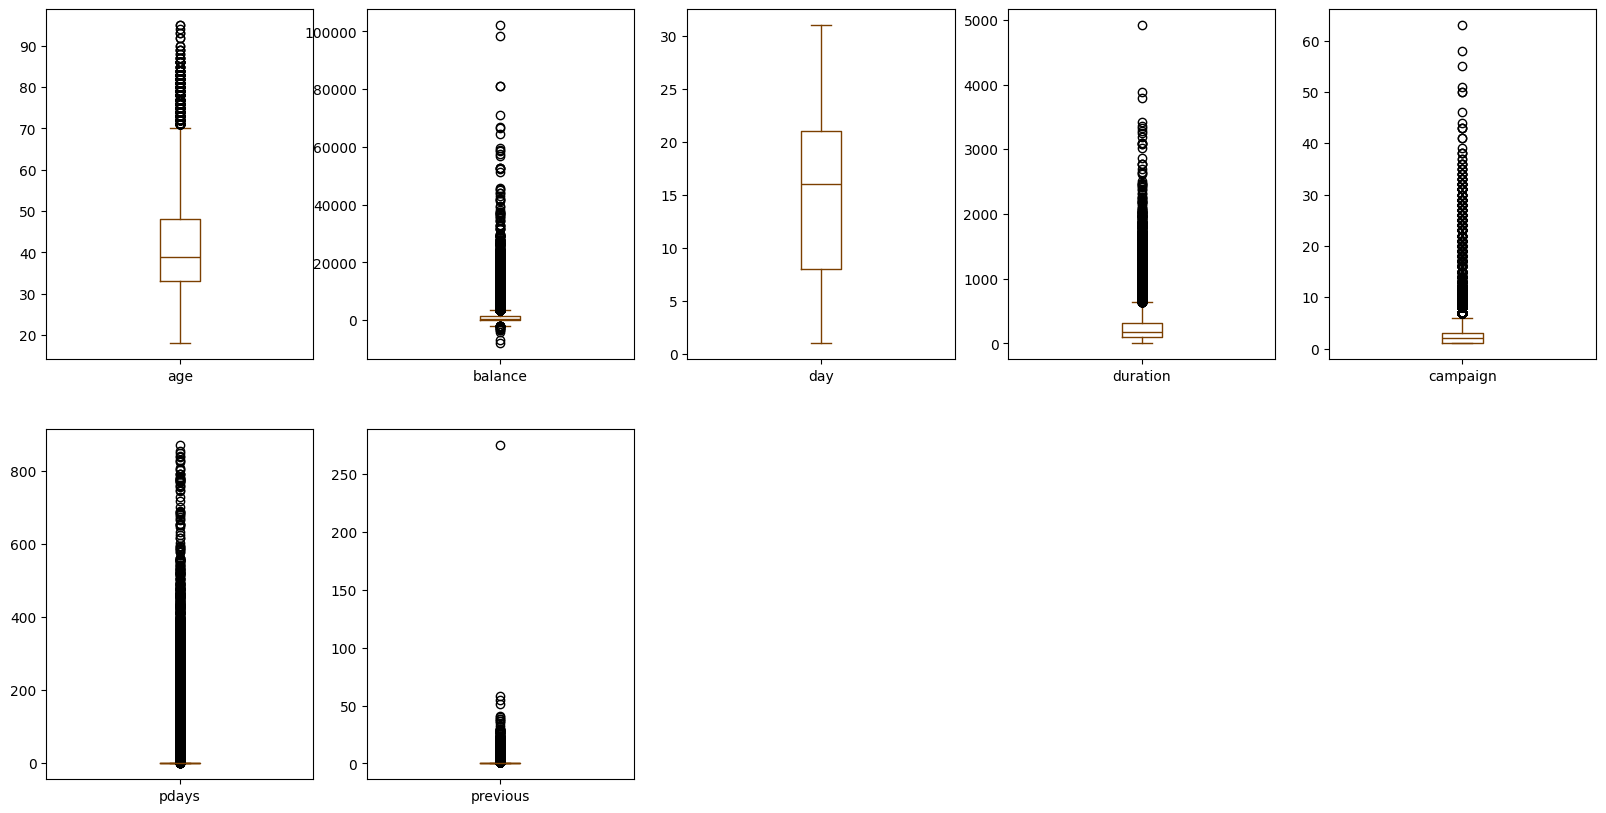

In [92]:
#checking the outliers
df.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [93]:
#removing the outliers

column = df[['age','balance', 'campaign','duration', 'pdays', 'previous']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','balance', 'campaign','duration', 'pdays', 'previous']] = column[(column > lower_bound) & (column < upper_bound)]

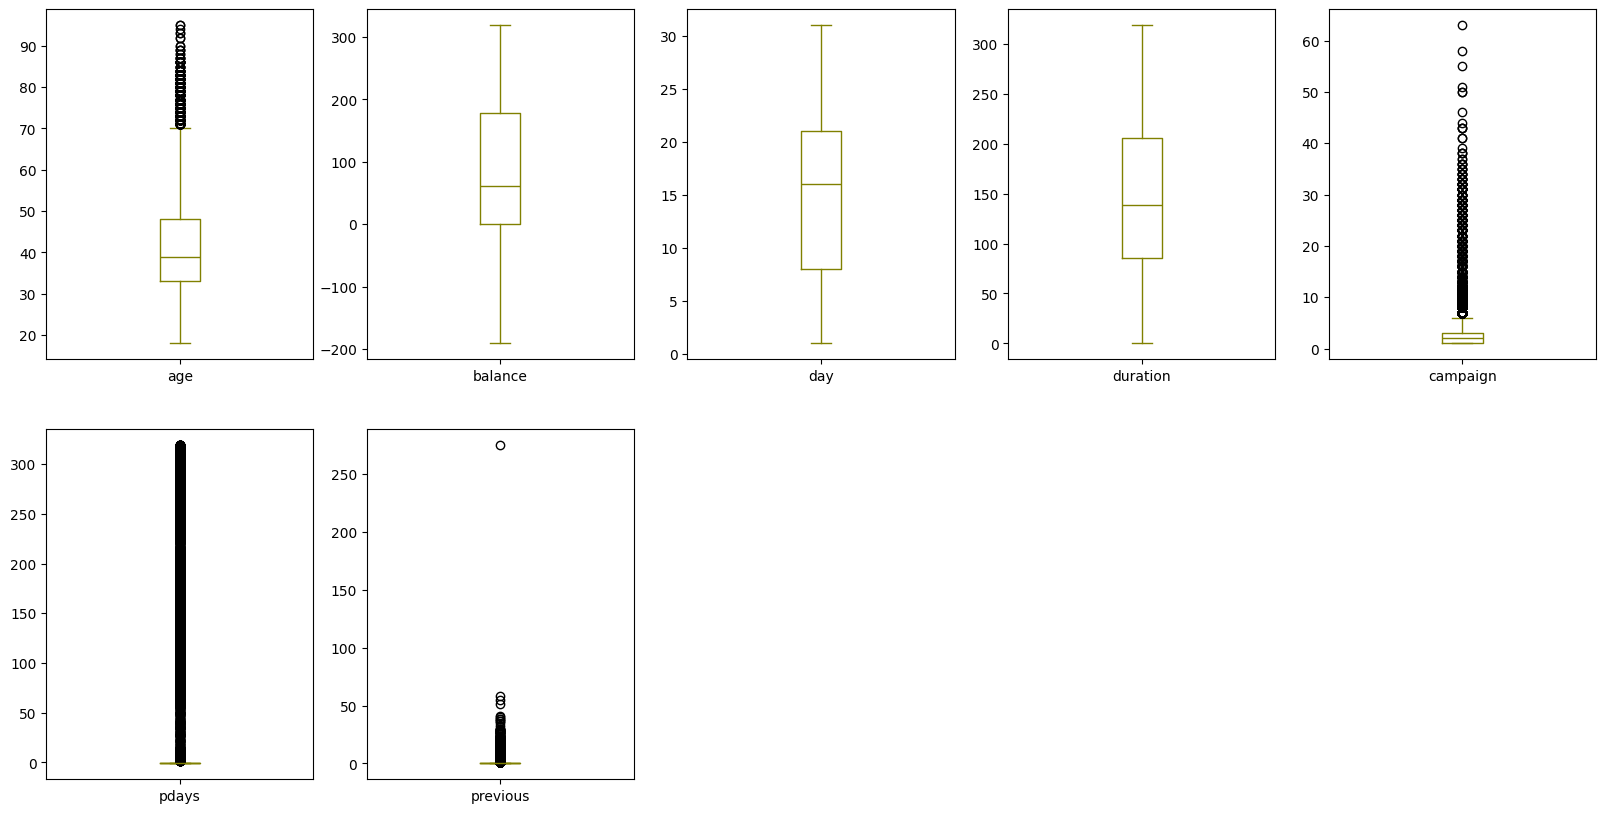

In [94]:
# Plotting boxplot after removing outliers
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()# Plotting boxplot after removing outliers


# Further analysis

<function matplotlib.pyplot.show(close=None, block=None)>

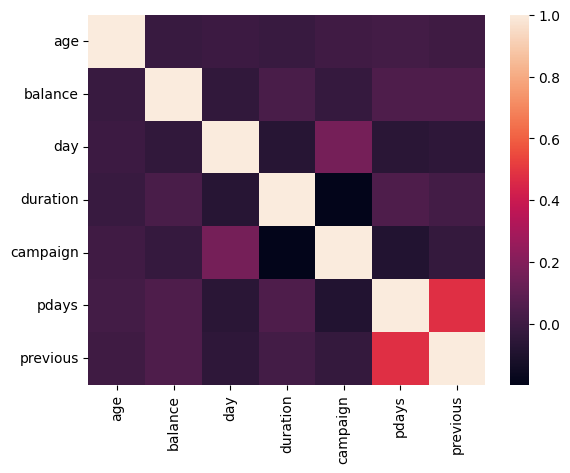

In [95]:
#checkin the coorrelations in dataset

sns.heatmap(df.corr(numeric_only=True))
plt.show

In [96]:
print(df.corr(numeric_only=True))

               age   balance       day  duration  campaign     pdays  previous
age       1.000000 -0.017567 -0.009120 -0.014670  0.004760  0.014946  0.001288
balance  -0.017567  1.000000 -0.039918  0.032779 -0.027149  0.051062  0.049713
day      -0.009120 -0.039918  1.000000 -0.072991  0.162490 -0.064762 -0.051710
duration -0.014670  0.032779 -0.072991  1.000000 -0.196654  0.049718  0.013808
campaign  0.004760 -0.027149  0.162490 -0.196654  1.000000 -0.086460 -0.032855
pdays     0.014946  0.051062 -0.064762  0.049718 -0.086460  1.000000  0.479501
previous  0.001288  0.049713 -0.051710  0.013808 -0.032855  0.479501  1.000000


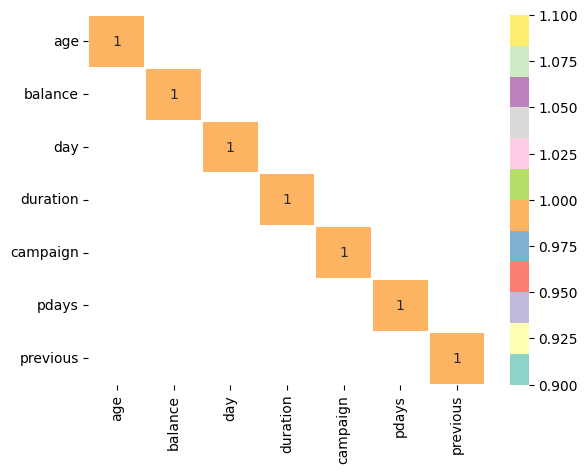

In [97]:
corr = df.corr(numeric_only=True)
corr = corr[abs(corr)>=0.75]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

Since there are no highly correlated columns, it is not necessary to drop them from original dataset

In [98]:
# Conversion of categorical columns into numerical columns using label encoder for binary tree formation as some ml models require numeric data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_enc = df.apply(lb.fit_transform)
display(df_enc)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,511,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,220,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,193,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,511,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,192,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,511,0,0,0,16,9,320,2,0,0,3,1
45207,53,5,0,0,0,511,0,0,0,16,9,320,1,0,0,3,1
45208,54,5,1,1,0,511,0,0,0,16,9,320,4,181,3,2,1
45209,39,1,1,1,0,511,0,0,1,16,9,320,3,0,0,3,0


In [99]:
df_enc['deposit'].value_counts()

deposit
0    39922
1     5289
Name: count, dtype: int64

In [100]:
x = df_enc.drop('deposit',axis=1)  # independent variable
y = df_enc['deposit']              # dependent variable

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
#Training model for decision tree classifier
dtc_train = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dtc_train.fit(x_train,y_train)
c = ['no','yes']
f = x_train.columns
print(f)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


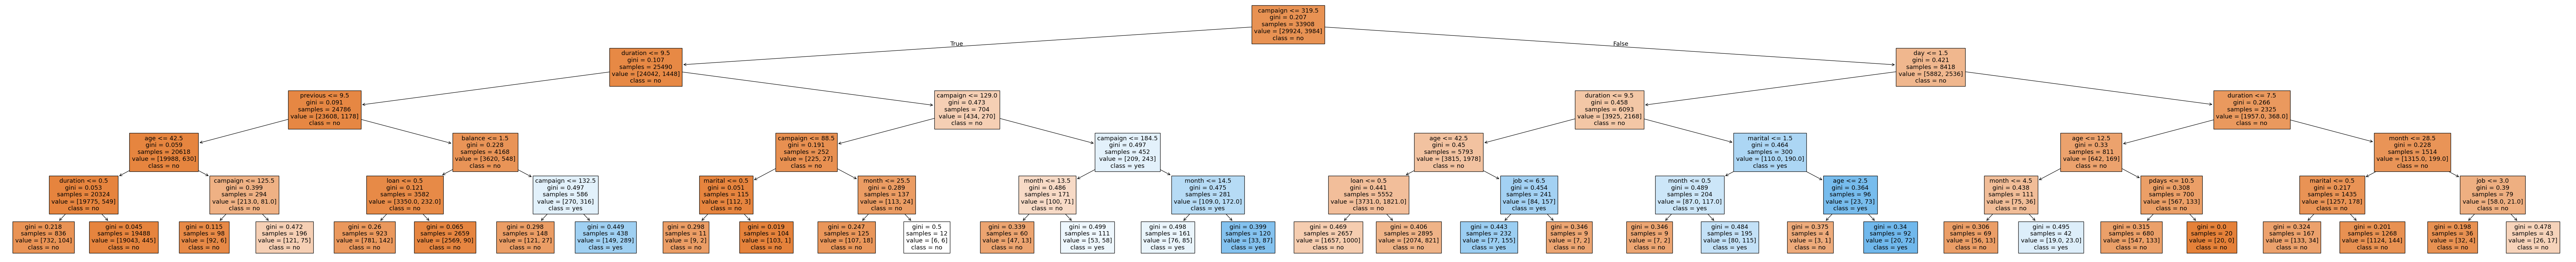

In [ ]:
#Constructing the decision tree classifier for train dataset
plt.figure(figsize=(100,10))
plot_tree(dtc_train,feature_names=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','balance'],class_names=['no', 'yes'],filled=True)
plt.show()

In [106]:
#Testing the model for decision tree classifier
dtc_test = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dtc_test.fit(x_train,y_train)
f = x_test.columns
print(f)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


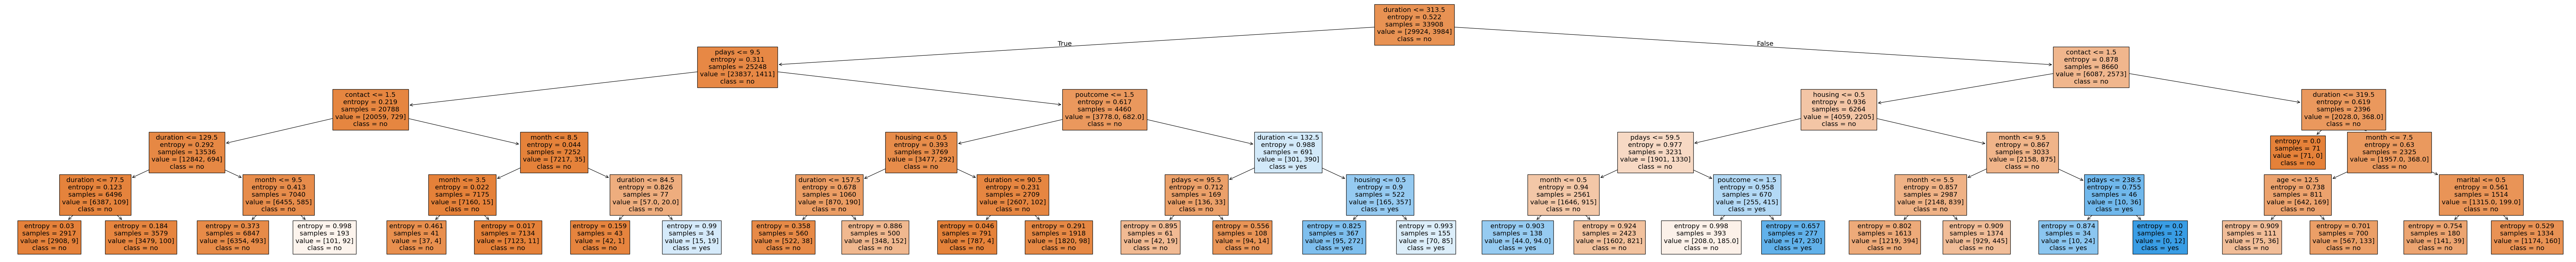

In [109]:
#Constructing the decision tree classifier for test dataset
plt.figure(figsize=(100,10))
plot_tree(dtc_test,feature_names=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],class_names=['no', 'yes'],filled=True)
plt.show()